# Import Libraries

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import random

# Import Data

In [2]:
data = pd.read_csv('data.csv')
data = data.set_index('ID')
data

C:\Users\Hybrid\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
ID,,,,,,,,,,,,,,,,,,,,,
000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8029.0,NaN,NaN
000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,NaN,...,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10091.0,NaN,NaN
000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,NaN,...,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
010-99995,52.0,female,Calleria,Coronel Portillo,Peru,-8.378190,-74.539700,point,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Peru,14429.0,NaN,False
010-99996,52.0,female,Pueblo Libre,Lima,Peru,-12.076530,-77.067350,point,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Peru,14695.0,NaN,False
010-99997,52.0,female,Comas,Lima,Peru,-11.932980,-77.040850,point,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Peru,14400.0,NaN,False


In [3]:
data.info(null_counts=True)

C:\Users\Hybrid\AppData\Local\Temp/ipykernel_3656/2063078779.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Index: 2676311 entries, 000-1-1 to 010-99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   age                       578018 non-null   object 
 1   sex                       580157 non-null   object 
 2   city                      1698630 non-null  object 
 3   province                  2223647 non-null  object 
 4   country                   2676196 non-null  object 
 5   latitude                  2676250 non-null  float64
 6   longitude                 2676250 non-null  float64
 7   geo_resolution            2676250 non-null  object 
 8   date_onset_symptoms       261599 non-null   object 
 9   date_admission_hospital   116211 non-null   object 
 10  date_confirmation         2567822 non-null  object 
 11  symptoms                  2052 non-null     object 
 12  lives_in_Wuhan            4338 non-null     object 
 13  travel_history_dates    

# Drop NAN-Labled Outcome

In [4]:
df = data.dropna(0, subset=['outcome'])
df

C:\Users\Hybrid\AppData\Local\Temp/ipykernel_3656/153399781.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = data.dropna(0, subset=['outcome'])


,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
ID,,,,,,,,,,,,,,,,,,,,,
000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8029.0,NaN,NaN
000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
000-1-101,28,male,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,NaN,...,20.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
000-1-102,56,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,NaN,...,02.03.2020,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
005-6014,80-,female,Chittenden County,Vermont,United States,44.461123,-73.081581,admin2,NaN,NaN,...,19.03.2020,NaN,NaN,NaN,Chittenden County,Vermont,United States,2239.0,NaN,False
005-809,60-69,male,Pennington County,South Dakota,United States,44.003584,-102.826120,admin2,NaN,NaN,...,NaN,NaN,NaN,NaN,Pennington County,South Dakota,United States,6948.0,NaN,False
005-82,90-99,female,King County,Washington,United States,47.491332,-121.803640,admin2,NaN,NaN,...,03.03.2020,NaN,NaN,NaN,King County,Washington,United States,5030.0,NaN,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307382 entries, 000-1-1 to 005-906
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       34435 non-null   object 
 1   sex                       38115 non-null   object 
 2   city                      263094 non-null  object 
 3   province                  306481 non-null  object 
 4   country                   307380 non-null  object 
 5   latitude                  307382 non-null  float64
 6   longitude                 307382 non-null  float64
 7   geo_resolution            307382 non-null  object 
 8   date_onset_symptoms       3543 non-null    object 
 9   date_admission_hospital   301 non-null     object 
 10  date_confirmation         307308 non-null  object 
 11  symptoms                  476 non-null     object 
 12  lives_in_Wuhan            174 non-null     object 
 13  travel_history_dates      315 non-null    

In [6]:
%store df

Stored 'df' (DataFrame)


# Remove Execive Columns

In [138]:
df_c = df.drop(columns=['date_onset_symptoms', 'date_admission_hospital', 
'symptoms', 'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location', 
'reported_market_exposure', 'notes_for_discussion', 'additional_information',
'chronic_disease', 'source', 'sequence_available', 'date_death_or_discharge', 'notes_for_discussion',
'location', 'admin3', 'admin2', 'admin1', 'city', 'province', 'country', 'country_new',
'admin_id', 'data_moderator_initials'])

In [139]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307382 entries, 000-1-1 to 005-906
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     34435 non-null   object 
 1   sex                     38115 non-null   object 
 2   latitude                307382 non-null  float64
 3   longitude               307382 non-null  float64
 4   geo_resolution          307382 non-null  object 
 5   date_confirmation       307308 non-null  object 
 6   chronic_disease_binary  307382 non-null  bool   
 7   outcome                 307382 non-null  object 
 8   travel_history_binary   307057 non-null  object 
dtypes: bool(1), float64(2), object(6)
memory usage: 21.4+ MB


# Fix Outcome Labels

In [140]:
pd.unique(df['outcome'])

array(['critical condition, intubated as of 14.02.2020', 'death',
       'discharge', 'discharged', 'Discharged',
       'Discharged from hospital', 'not hospitalized', 'recovered',
       'recovering at home 03.03.2020', 'released from quarantine',
       'severe', 'stable', 'died', 'Death', 'dead',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'treated in an intensive care unit (14.02.2020)', 'Alive', 'Dead',
       'Recovered', 'Stable', 'Died', 'Deceased', 'stable condition',
       'Under treatment', 'Critical condition', 'Receiving Treatment',
       'severe illness', 'unstable', 'critical condition', 'Hospitalized',
       'Migrated', 'Migrated_Other',
       'https://www.mspbs.gov.py/covid-19.php'], dtype=object)

In [141]:
df_c = df_c[df_c['outcome'] != 'https://www.mspbs.gov.py/covid-19.php']

In [142]:
critical = 'critical'
dead = 'dead'
discharged = 'discharged'
hospitalized = 'hospitalized'
recovered = 'recovered'
stable = 'stable'
alive = 'alive'
deceased = 'deceased'
under_treatment = 'under treatment'
severe = 'severe'
migrated = 'migrated'

dict_outcome = {'critical condition, intubated as of 14.02.2020' : critical,
 'Critical condition' : critical, 'critical condition': critical,
  'death' : dead, 'died' : dead, 'Death' : dead, 'dead' : dead, 'Dead' : dead, 'Died' : dead,
  'deceased' : dead,
  'discharge' : discharged, 'discharged' : discharged, 'Discharged' : discharged,
  'Discharged from hospital' : discharged,
  'Symptoms only improved with cough. Currently hospitalized for follow-up.' : hospitalized,
  'Hospitalized' : hospitalized,
  'recovered' : recovered, 'Recovered' : recovered, 
  'recovering at home 03.03.2020' : stable, 'stable': stable, 'Stable' : stable,
  'stable condition' : stable, 'treated in an intensive care unit (14.02.2020)' : stable,
  'Alive' : alive,
  'Deceased' : deceased,
  'Under treatment' : under_treatment, 'Receiving Treatment' : under_treatment,
  'severe' : severe, 'severe illness' : severe,
  'Migrated' : migrated, 'Migrated_Other' : migrated
  }
df_c = df_c.replace(dict_outcome)

In [143]:
pd.unique(df_c['outcome'])

array(['critical', 'dead', 'discharged', 'not hospitalized', 'recovered',
       'stable', 'released from quarantine', 'severe', 'hospitalized',
       'alive', 'deceased', 'under treatment', 'unstable', 'migrated'],
      dtype=object)

<AxesSubplot:xlabel='outcome', ylabel='Count'>

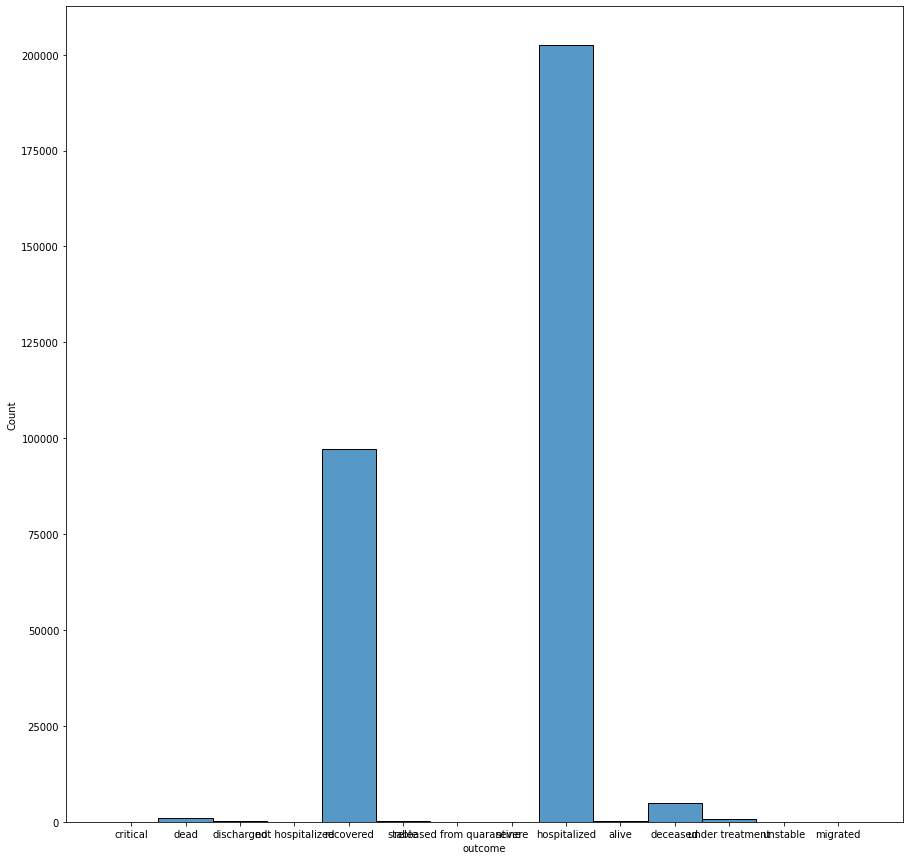

In [144]:
plt.figure(figsize=(15,15))
sns.histplot(df_c['outcome'])

In [145]:
%store df_c

Stored 'df_c' (DataFrame)


In [146]:
labels = df_c['outcome'].unique()
dict_count = {}

for i in labels:
    dict_count[i] = 0

for i in df_c['outcome']:
    dict_count[i] = dict_count[i] + 1

dict_count

{'critical': 4,
 'dead': 988,
 'discharged': 298,
 'not hospitalized': 2,
 'recovered': 97315,
 'stable': 324,
 'released from quarantine': 4,
 'severe': 3,
 'hospitalized': 202477,
 'alive': 189,
 'deceased': 5011,
 'under treatment': 627,
 'unstable': 1,
 'migrated': 13}

In [147]:
df_c_l = df_c.replace({'released from quarantine' : recovered, deceased : dead,
 'severe' : under_treatment, 'migrated' : hospitalized,
 'not hospitalized' : alive, 'unstable' : under_treatment, discharged : recovered,
 'critical' : under_treatment})

In [148]:
labels = df_c_l['outcome'].unique()
dict_count = {}

for i in labels:
    dict_count[i] = 0

for i in df_c_l['outcome']:
    dict_count[i] = dict_count[i] + 1

dict_count

{'under treatment': 635,
 'dead': 5999,
 'recovered': 97617,
 'alive': 191,
 'stable': 324,
 'hospitalized': 202490}

<AxesSubplot:xlabel='outcome', ylabel='Count'>

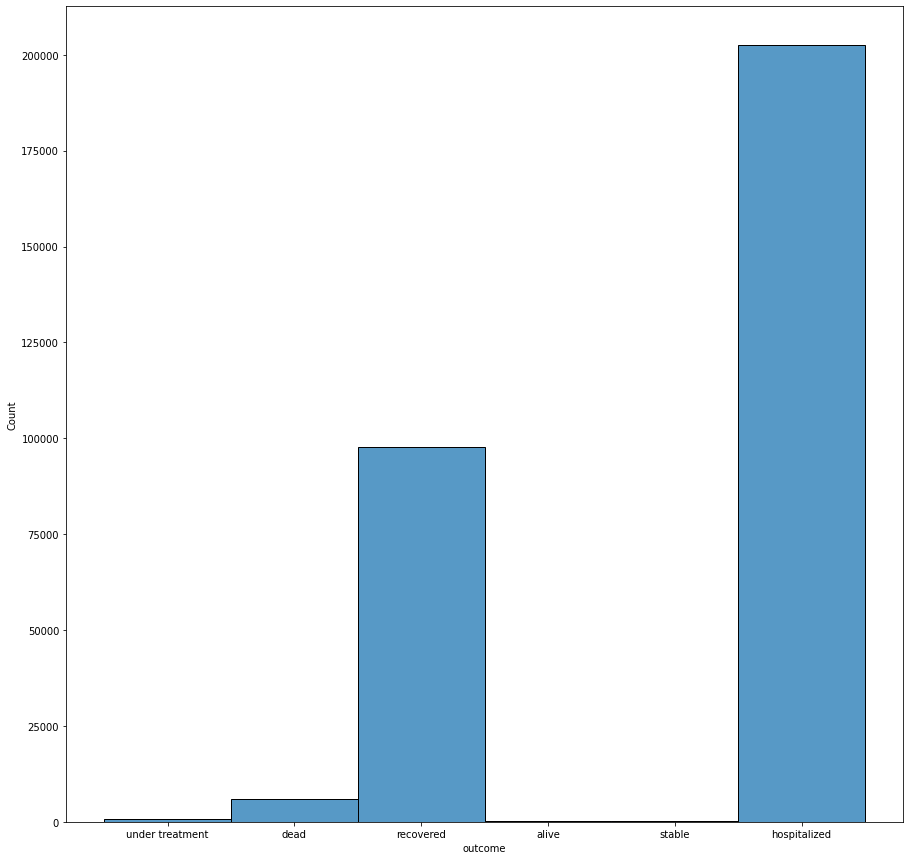

In [162]:
plt.figure(figsize=(15,15))
sns.histplot(df_c_l['outcome'])

In [150]:
df_c = df_c_l

In [151]:
%store df_c

Stored 'df_c' (DataFrame)


# Fix Age Feature

In [152]:
pd.unique(df_c['age'])

array([nan, '78', '61', '28', '56', '79', '26', '25', '40', '43', '29',
       '71', '68', '1', '35', '36', '32', '30', '41', '58', '38', '88',
       '22', '55', '12', '54', '57', '24', '44', '95', '39', '46', '27',
       '66', '51', '50-59', '80-89', '42', '7', '33', '4', '60', '20',
       '94', '38-68', '63', '0.5', '53', '52', '9', '31', '60-69',
       '20-29', '40-49', '70-79', '47', '50', '37', '76', '62', '70',
       '65', '21', '64', '23', '45', '87', '2', '67', '22-80', '19-77',
       '21-72', '82', '90-99', '73', '92', '49', '48', '8', '16', '0.25',
       '77', '34', '72', '85', '69', '81', '15-88', '89', '75', '80',
       '86', '84', '74', '59', '18', '15', '17', '19', '14', '20-57',
       '0.75', '13', '10', '11', '91', '90', '0', '83', '6', '3', '99',
       '96', '28-35', 39.0, 44.0, 54.0, 45.0, 30.0, 33.0, 50.0, 20.0,
       53.0, 46.0, 31.0, 35.0, 80.0, 72.0, 24.0, 37.0, 27.0, 65.0, 28.0,
       40.0, 34.0, 36.0, 41.0, 38.0, 57.0, 32.0, 52.0, 47.0, 21.0, 55.0,
 

In [153]:
age_list = []
for item in df_c['age']:
    if '-' in str(item):
        a , b = str(item).split('-')
        if a != '' and b != '':
            a = float(a)
            b = float(b)
            result = (a + b) / 2
            age_list.append(int(result))
        else:
            if a != '':
                age_list.append(int(a))
            else:
                age_list.append(int(b))
    elif not math.isnan(float(item)):
        age_list.append(math.floor(float(item)))
    else:
        age_list.append(item)
len(age_list)

307256

In [154]:
df_c['age'] = age_list
df_c

,age,sex,latitude,longitude,geo_resolution,date_confirmation,chronic_disease_binary,outcome,travel_history_binary
ID,,,,,,,,,
000-1-1,NaN,male,22.365019,114.133808,point,14.02.2020,False,under treatment,NaN
000-1-10,78.0,male,45.297748,11.658382,point,21.02.2020,False,dead,NaN
000-1-100,61.0,female,1.353460,103.815100,admin0,14.02.2020,False,recovered,NaN
000-1-101,28.0,male,1.353460,103.815100,admin0,14.02.2020,False,recovered,NaN
000-1-102,56.0,female,1.353460,103.815100,admin0,14.02.2020,False,recovered,NaN
...,...,...,...,...,...,...,...,...,...
005-6014,80.0,female,44.461123,-73.081581,admin2,18.03.2020,False,dead,False
005-809,64.0,male,44.003584,-102.826120,admin2,10.03.2020,False,dead,False
005-82,94.0,female,47.491332,-121.803640,admin2,04.03.2020,False,dead,False


In [155]:
pd.unique(df_c['age'])

array([ nan,  78.,  61.,  28.,  56.,  79.,  26.,  25.,  40.,  43.,  29.,
        71.,  68.,   1.,  35.,  36.,  32.,  30.,  41.,  58.,  38.,  88.,
        22.,  55.,  12.,  54.,  57.,  24.,  44.,  95.,  39.,  46.,  27.,
        66.,  51.,  84.,  42.,   7.,  33.,   4.,  60.,  20.,  94.,  53.,
        63.,   0.,  52.,   9.,  31.,  64.,  74.,  47.,  50.,  37.,  76.,
        62.,  70.,  65.,  21.,  23.,  45.,  87.,   2.,  67.,  48.,  82.,
        73.,  92.,  49.,   8.,  16.,  77.,  34.,  72.,  85.,  69.,  81.,
        89.,  75.,  80.,  86.,  59.,  18.,  15.,  17.,  19.,  14.,  13.,
        10.,  11.,  91.,  90.,  83.,   6.,   3.,  99.,  96.,   5.,  98.,
        93.,  97., 101.])

# Fix Date of Confirmation

In [156]:
df_c = df_c.dropna(subset=['date_confirmation'])
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307182 entries, 000-1-1 to 005-906
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     34364 non-null   float64
 1   sex                     38044 non-null   object 
 2   latitude                307182 non-null  float64
 3   longitude               307182 non-null  float64
 4   geo_resolution          307182 non-null  object 
 5   date_confirmation       307182 non-null  object 
 6   chronic_disease_binary  307182 non-null  bool   
 7   outcome                 307182 non-null  object 
 8   travel_history_binary   306896 non-null  object 
dtypes: bool(1), float64(3), object(5)
memory usage: 21.4+ MB


In [157]:
dates = pd.unique(df_c['date_confirmation'])

In [158]:
c = 0
for item in dates:
    df_c = df_c.replace({item : c})
    c += 1
df_c

,age,sex,latitude,longitude,geo_resolution,date_confirmation,chronic_disease_binary,outcome,travel_history_binary
ID,,,,,,,,,
000-1-1,NaN,male,22.365019,114.133808,point,0,False,under treatment,NaN
000-1-10,78.0,male,45.297748,11.658382,point,1,False,dead,NaN
000-1-100,61.0,female,1.353460,103.815100,admin0,0,False,recovered,NaN
000-1-101,28.0,male,1.353460,103.815100,admin0,0,False,recovered,NaN
000-1-102,56.0,female,1.353460,103.815100,admin0,0,False,recovered,NaN
...,...,...,...,...,...,...,...,...,...
005-6014,80.0,female,44.461123,-73.081581,admin2,63,False,dead,False
005-809,64.0,male,44.003584,-102.826120,admin2,40,False,dead,False
005-82,94.0,female,47.491332,-121.803640,admin2,15,False,dead,False


# Fix Travel History Binary

In [159]:
df_c['travel_history_binary'] = df_c['travel_history_binary'].astype(bool)

In [160]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307182 entries, 000-1-1 to 005-906
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     34364 non-null   float64
 1   sex                     38044 non-null   object 
 2   latitude                307182 non-null  float64
 3   longitude               307182 non-null  float64
 4   geo_resolution          307182 non-null  object 
 5   date_confirmation       307182 non-null  int64  
 6   chronic_disease_binary  307182 non-null  bool   
 7   outcome                 307182 non-null  object 
 8   travel_history_binary   307182 non-null  bool   
dtypes: bool(2), float64(3), int64(1), object(3)
memory usage: 19.3+ MB


# Save df_c

In [161]:
%store df_c

Stored 'df_c' (DataFrame)


In [136]:
%load 'df_c'

# Remove Nulls with Hospitalized label

In [195]:
df_hpz = df_c[df_c['outcome'] == hospitalized]
df_hpz = df_hpz[df_hpz['age'].isna()]
df_cc = df_c.drop(df_hpz.index)
df_hpz = df_cc[df_cc['outcome'] == hospitalized]
df_hpz = df_hpz[df_hpz['sex'].isna()]
df_cc = df_cc.drop(df_hpz.index)
df_cc

,age,sex,latitude,longitude,geo_resolution,date_confirmation,chronic_disease_binary,outcome,travel_history_binary
ID,,,,,,,,,
000-1-1,NaN,male,22.365019,114.133808,point,0,False,under treatment,True
000-1-10,78.0,male,45.297748,11.658382,point,1,False,dead,True
000-1-100,61.0,female,1.353460,103.815100,admin0,0,False,recovered,True
000-1-101,28.0,male,1.353460,103.815100,admin0,0,False,recovered,True
000-1-102,56.0,female,1.353460,103.815100,admin0,0,False,recovered,True
...,...,...,...,...,...,...,...,...,...
005-6014,80.0,female,44.461123,-73.081581,admin2,63,False,dead,False
005-809,64.0,male,44.003584,-102.826120,admin2,40,False,dead,False
005-82,94.0,female,47.491332,-121.803640,admin2,15,False,dead,False


<AxesSubplot:xlabel='outcome', ylabel='Count'>

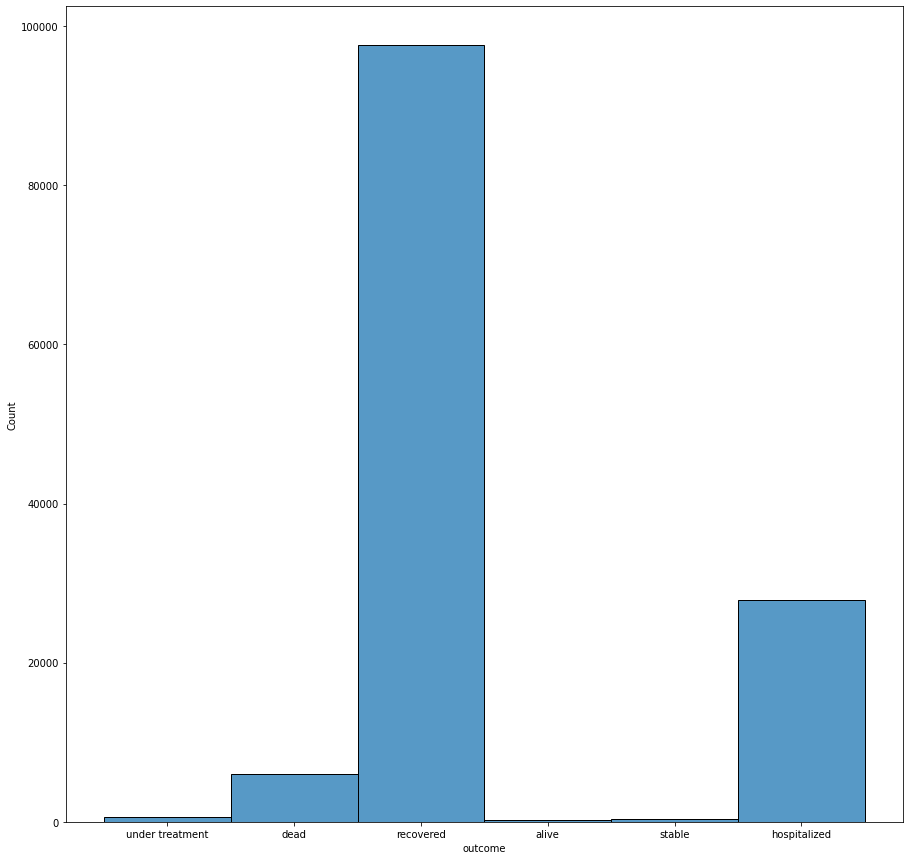

In [196]:
plt.figure(figsize=(15,15))
sns.histplot(df_cc['outcome'])

# Remove Nulls with Recovered label

<AxesSubplot:xlabel='date_confirmation', ylabel='Count'>

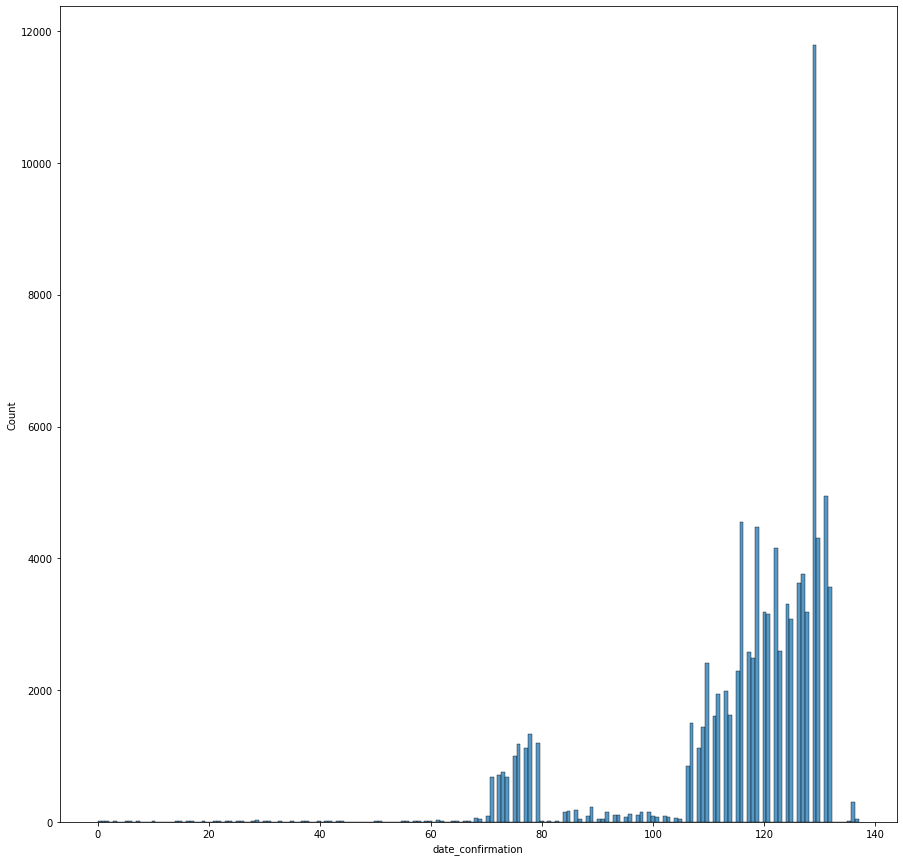

In [202]:
plt.figure(figsize=(15,15))
sns.histplot(df_cc[df_cc['outcome'] == recovered]['date_confirmation'])

In [227]:
df_rec = df_cc[df_cc['outcome'] == recovered]
#df_rec = df_rec[df_rec['date_confirmation'] < 128]
df_rec = df_rec[df_rec['age'].isna()]
df_ccc = df_cc.drop(df_rec.index)

df_rec = df_ccc[df_ccc['outcome'] == recovered]
#df_rec = df_rec[df_rec['date_confirmation'] < 128]
df_rec = df_rec[df_rec['sex'].isna()]
df_ccc = df_ccc.drop(df_rec.index)

df_ccc

,age,sex,latitude,longitude,geo_resolution,date_confirmation,chronic_disease_binary,outcome,travel_history_binary
ID,,,,,,,,,
000-1-1,NaN,male,22.365019,114.133808,point,0,False,under treatment,True
000-1-10,78.0,male,45.297748,11.658382,point,1,False,dead,True
000-1-100,61.0,female,1.353460,103.815100,admin0,0,False,recovered,True
000-1-101,28.0,male,1.353460,103.815100,admin0,0,False,recovered,True
000-1-102,56.0,female,1.353460,103.815100,admin0,0,False,recovered,True
...,...,...,...,...,...,...,...,...,...
005-6014,80.0,female,44.461123,-73.081581,admin2,63,False,dead,False
005-809,64.0,male,44.003584,-102.826120,admin2,40,False,dead,False
005-82,94.0,female,47.491332,-121.803640,admin2,15,False,dead,False


<AxesSubplot:xlabel='outcome', ylabel='Count'>

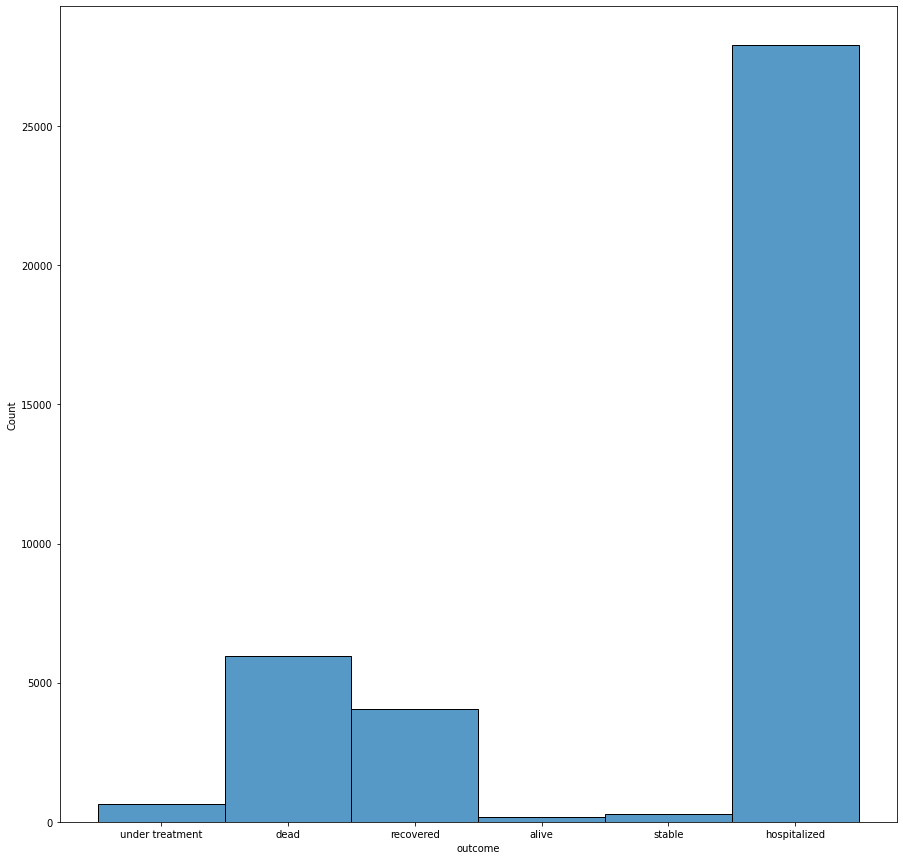

In [228]:
plt.figure(figsize=(15,15))
sns.histplot(df_ccc['outcome'])

In [254]:
df_c = df_ccc

# Drop 1/3 of the Records of Hospitalized Label

In [257]:
df_hpz = df_c[df_c['outcome'] == hospitalized]
print(df_hpz.shape)
print(df_hpz.shape)

df_hpz = df_hpz.reset_index()

saved_indexes = []
c = 0
for i in df_hpz.index:
    if c % 3 == 0:
        saved_indexes.append(i)
    c += 1


df_hpz = df_hpz.drop(saved_indexes)
print(df_hpz.shape)

df_hpz = df_hpz.set_index('ID')

df_c = df_c.drop(df_hpz.index)
df_c

(13955, 9)
(13955, 9)
(9303, 10)


,age,sex,latitude,longitude,geo_resolution,date_confirmation,chronic_disease_binary,outcome,travel_history_binary
ID,,,,,,,,,
000-1-1,NaN,male,22.365019,114.133808,point,0,False,under treatment,True
000-1-10,78.0,male,45.297748,11.658382,point,1,False,dead,True
000-1-100,61.0,female,1.353460,103.815100,admin0,0,False,recovered,True
000-1-101,28.0,male,1.353460,103.815100,admin0,0,False,recovered,True
000-1-102,56.0,female,1.353460,103.815100,admin0,0,False,recovered,True
...,...,...,...,...,...,...,...,...,...
005-6014,80.0,female,44.461123,-73.081581,admin2,63,False,dead,False
005-809,64.0,male,44.003584,-102.826120,admin2,40,False,dead,False
005-82,94.0,female,47.491332,-121.803640,admin2,15,False,dead,False


<AxesSubplot:xlabel='outcome', ylabel='Count'>

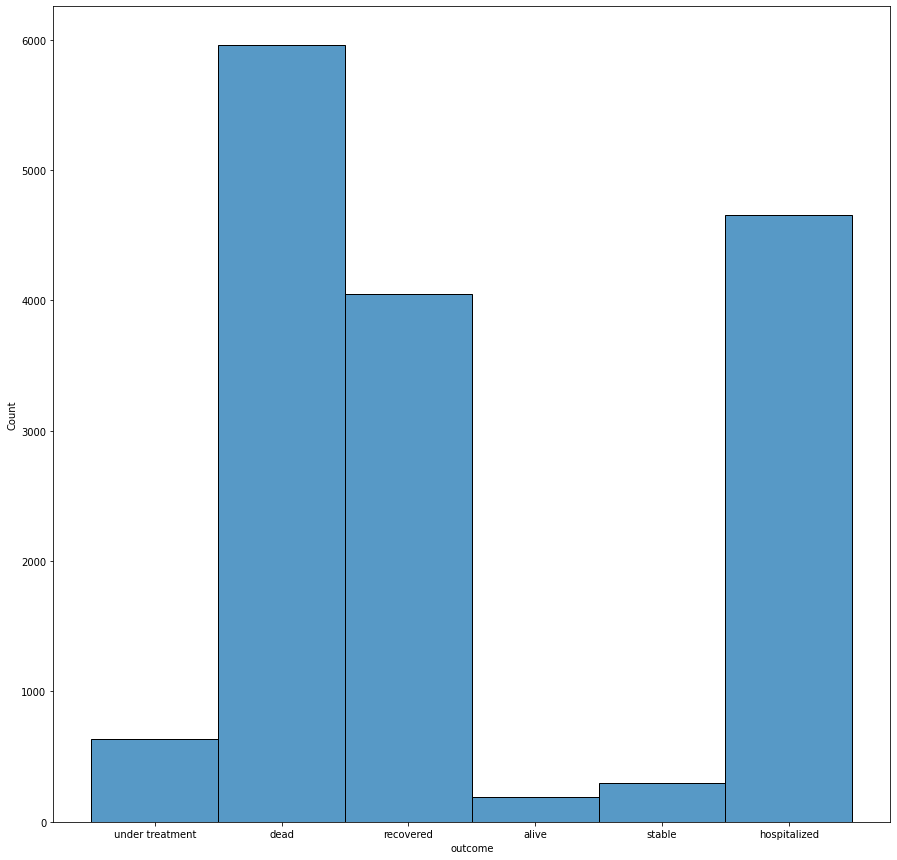

In [258]:
plt.figure(figsize=(15,15))
sns.histplot(df_c['outcome'])

In [260]:
%store df_c

Stored 'df_c' (DataFrame)


# Feature Encoding

In [261]:
X = pd.get_dummies(df_c.drop(columns=['outcome']))
y = df_c['outcome']

In [262]:
X

,age,latitude,longitude,date_confirmation,chronic_disease_binary,travel_history_binary,sex_female,sex_male,geo_resolution_admin0,geo_resolution_admin1,geo_resolution_admin2,geo_resolution_admin3,geo_resolution_point
ID,,,,,,,,,,,,,
000-1-1,NaN,22.365019,114.133808,0,False,True,0,1,0,0,0,0,1
000-1-10,78.0,45.297748,11.658382,1,False,True,0,1,0,0,0,0,1
000-1-100,61.0,1.353460,103.815100,0,False,True,1,0,1,0,0,0,0
000-1-101,28.0,1.353460,103.815100,0,False,True,0,1,1,0,0,0,0
000-1-102,56.0,1.353460,103.815100,0,False,True,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
005-6014,80.0,44.461123,-73.081581,63,False,False,1,0,0,0,1,0,0
005-809,64.0,44.003584,-102.826120,40,False,False,0,1,0,0,1,0,0
005-82,94.0,47.491332,-121.803640,15,False,False,1,0,0,0,1,0,0


In [263]:
y

ID
000-1-1      under treatment
000-1-10                dead
000-1-100          recovered
000-1-101          recovered
000-1-102          recovered
                  ...       
005-6014                dead
005-809                 dead
005-82                  dead
005-822                 dead
005-906            recovered
Name: outcome, Length: 15783, dtype: object

# Impute

In [264]:
imputer = KNNImputer()
imputer.fit(X=X,y=y)
X_imp = imputer.transform(X) 

In [265]:
X_imp = pd.DataFrame(X_imp, columns=X.columns, index=X.index)
X_imp

,age,latitude,longitude,date_confirmation,chronic_disease_binary,travel_history_binary,sex_female,sex_male,geo_resolution_admin0,geo_resolution_admin1,geo_resolution_admin2,geo_resolution_admin3,geo_resolution_point
ID,,,,,,,,,,,,,
000-1-1,54.4,22.365019,114.133808,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
000-1-10,78.0,45.297748,11.658382,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
000-1-100,61.0,1.353460,103.815100,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
000-1-101,28.0,1.353460,103.815100,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
000-1-102,56.0,1.353460,103.815100,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
005-6014,80.0,44.461123,-73.081581,63.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
005-809,64.0,44.003584,-102.826120,40.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
005-82,94.0,47.491332,-121.803640,15.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [266]:
X_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15783 entries, 000-1-1 to 005-906
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     15783 non-null  float64
 1   latitude                15783 non-null  float64
 2   longitude               15783 non-null  float64
 3   date_confirmation       15783 non-null  float64
 4   chronic_disease_binary  15783 non-null  float64
 5   travel_history_binary   15783 non-null  float64
 6   sex_female              15783 non-null  float64
 7   sex_male                15783 non-null  float64
 8   geo_resolution_admin0   15783 non-null  float64
 9   geo_resolution_admin1   15783 non-null  float64
 10  geo_resolution_admin2   15783 non-null  float64
 11  geo_resolution_admin3   15783 non-null  float64
 12  geo_resolution_point    15783 non-null  float64
dtypes: float64(13)
memory usage: 2.2+ MB


In [267]:
X = X_imp.convert_dtypes()

In [268]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15783 entries, 000-1-1 to 005-906
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     15783 non-null  Float64
 1   latitude                15783 non-null  Float64
 2   longitude               15783 non-null  Float64
 3   date_confirmation       15783 non-null  Int64  
 4   chronic_disease_binary  15783 non-null  Int64  
 5   travel_history_binary   15783 non-null  Int64  
 6   sex_female              15783 non-null  Int64  
 7   sex_male                15783 non-null  Int64  
 8   geo_resolution_admin0   15783 non-null  Int64  
 9   geo_resolution_admin1   15783 non-null  Int64  
 10  geo_resolution_admin2   15783 non-null  Int64  
 11  geo_resolution_admin3   15783 non-null  Int64  
 12  geo_resolution_point    15783 non-null  Int64  
dtypes: Float64(3), Int64(10)
memory usage: 2.4+ MB


# Check Correlations

<AxesSubplot:>

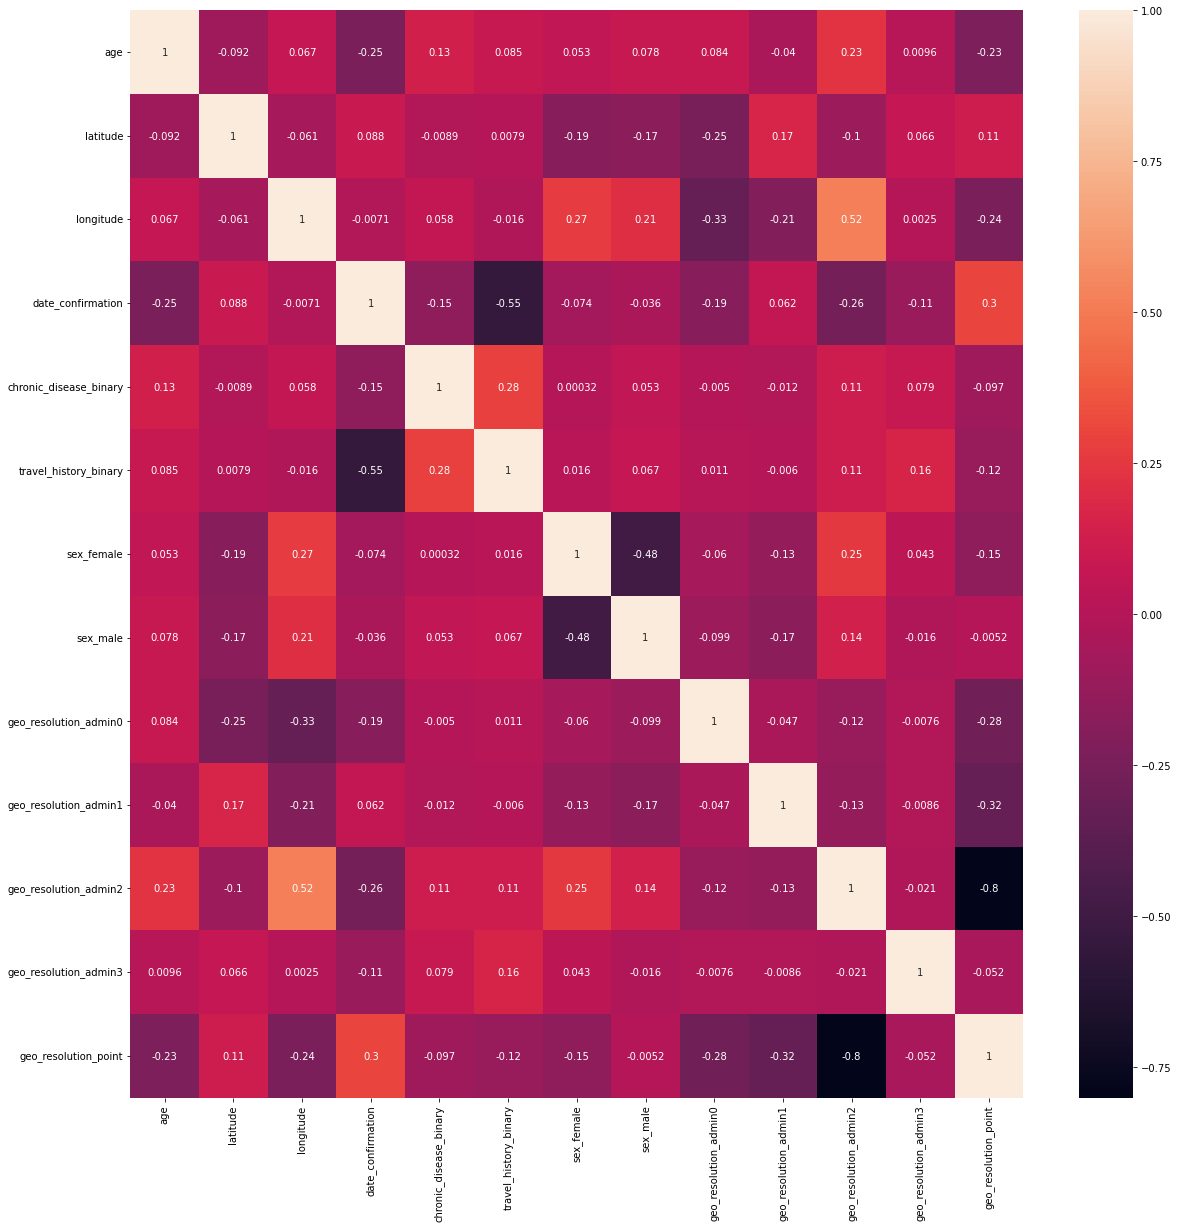

In [269]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), annot=True)

In [270]:
def find_high_correlation(df, threshold):
    dict_high_cor = {}

    for col in df.columns:
        c = 0
        temp_list = []
        for i in df.corr()[col]:
            if(np.abs(float(i)) >= threshold and df.columns[c] != col) :
                temp_list.append(df.columns[c])
            c+=1
        dict_high_cor[col] = temp_list
    
    return dict_high_cor

In [271]:
find_high_correlation(X, 0.6)

{'age': [],
 'latitude': [],
 'longitude': [],
 'date_confirmation': [],
 'chronic_disease_binary': [],
 'travel_history_binary': [],
 'sex_female': [],
 'sex_male': [],
 'geo_resolution_admin0': [],
 'geo_resolution_admin1': [],
 'geo_resolution_admin2': ['geo_resolution_point'],
 'geo_resolution_admin3': [],
 'geo_resolution_point': ['geo_resolution_admin2']}

# Save Datasets

In [272]:
X.to_csv('X.csv', header=True)
y.to_csv('y.csv', header=True)